# Graph Properties

<a href="https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Graph_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, setting up our environment.

In [ ]:
%%capture
!pip3 install networkx
!pip3 install matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# First Graph

Let us create our first Graph for today :-).

Vertices:
[1, 2, 3, 4]
Edges:
[(1, 2), (1, 4), (2, 3), (3, 4)]
Degree deg(1):
2
Eccentricity e(1):
2
Diameter d(G):
2


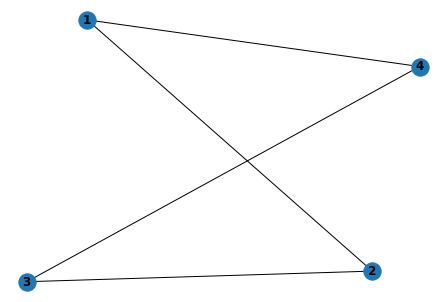

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3,4), (4,1)])

nx.draw(G, with_labels=True, font_weight='bold')

print("Vertices:")
print(list(G.nodes))

print("Edges:")
print(list(G.edges))

print("Degree deg(1):")
print(G.degree[1])

print("Eccentricity e(1):")
print(nx.eccentricity(G,1))

print("Diameter d(G):")
print(nx.diameter(G))

# Graph Properties

Next, let us explore different Graph properties.

Feel free to alter the graph itself!

Degree:
2
Indegree:
1
Outdegree:
1


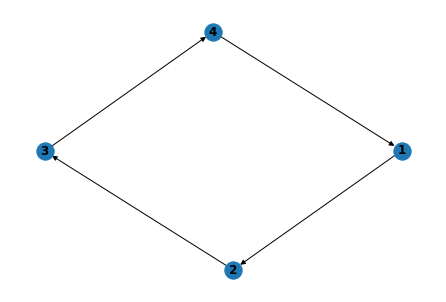

In [ ]:
dg = nx.DiGraph()
dg.add_edges_from([(1, 2), (2, 3), (3,4), (4,1)])
nx.draw(dg, with_labels=True, font_weight='bold')

print("Degree:")
print(dg.degree[1])
print("Indegree:")
print(dg.in_degree[1])
print("Outdegree:")
print(dg.out_degree[1])


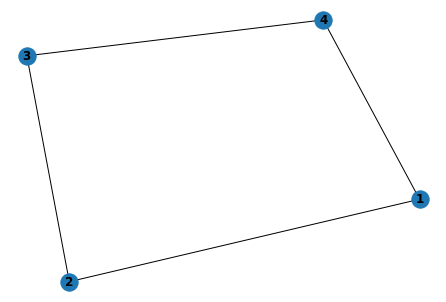

In [ ]:
# Weighted Graph
wg = nx.Graph()
wg.add_edge(1, 2, weight=0.54)
wg.add_weighted_edges_from([ (2, 3, 0.75), (3, 4, 1), (4, 1, 1.25)])
nx.draw(wg, with_labels=True, font_weight='bold')


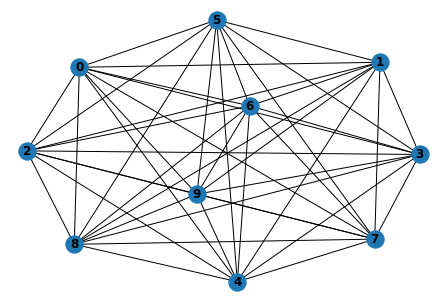

In [ ]:
# Complete Graph where all vertices are connected to all veritices
com = nx.complete_graph(10)
nx.draw(com, with_labels=True, font_weight='bold')

{1, 2, 3, 4}
{'a', 'b', 'c'}


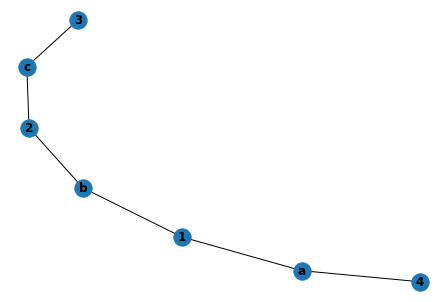

In [ ]:
# Bipartite Graph has two distict classes/types of nodes where each class is just connected to the other class
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

nx.draw(B, with_labels=True, font_weight='bold')

set1, set2 = nx.bipartite.sets(B)
print(set1)
print(set2)

# Graph Algorithms

## Traversals

Next, let us look at simple Graph algorithms starting with Traversals:

[(0, 1), (1, 2), (2, 3), (3, 4)]
[(0, 1), (0, 2), (0, 3), (0, 4)]


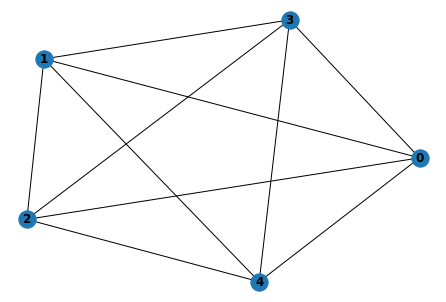

In [ ]:
S = nx.nx.complete_graph(5)
nx.draw(S, with_labels=True, font_weight='bold')

# Depth First
print(list(nx.dfs_edges(S, source=0)))

# Breadth First
print(list(nx.bfs_edges(S, source=0)))

# Shortest Path

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


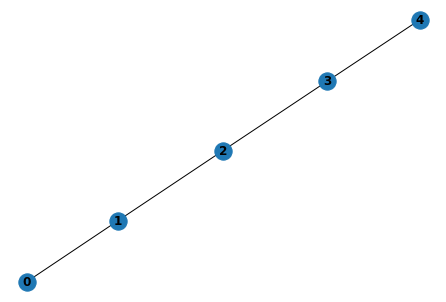

In [ ]:
G = nx.path_graph(5)
nx.draw(G, with_labels=True, font_weight='bold')

# Dijkstra
print(nx.dijkstra_path(G, 0, 4))

# Bellmann Ford 
print(nx.bellman_ford_path(G, 0, 4))

# TODO: Test with negative weights

See more: https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html

# Minimal Spanning Tree

[[0, 1], [1, 2], [2, 3]]
[[0, 1], [1, 2], [2, 3]]


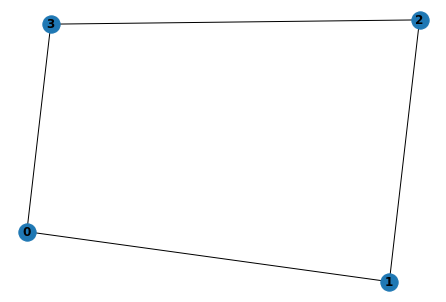

In [ ]:
from networkx.algorithms import tree
G = nx.cycle_graph(4)
G.add_edge(0, 3, weight=2)
nx.draw(G, with_labels=True, font_weight='bold')

# Kruskal's Algorithm
mst = tree.minimum_spanning_edges(G, algorithm="kruskal", data=False)
edgelist = list(mst)
print(sorted(sorted(e) for e in edgelist))

# Prim's Algorithm
mst = tree.minimum_spanning_edges(G, algorithm="prim", data=False)
edgelist = list(mst)
print(sorted(sorted(e) for e in edgelist))

# Cycle Detection


[[0], [2], [0, 2], [0, 1, 2], [1, 2]]

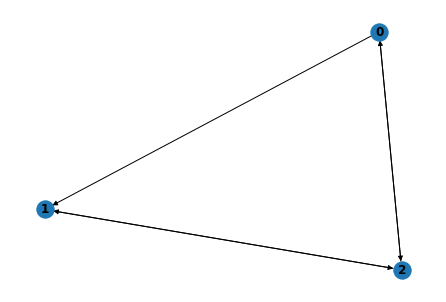

In [ ]:
edges = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2)]
G = nx.DiGraph(edges)
nx.draw(G, with_labels=True, font_weight='bold')

list(nx.simple_cycles(G))

# Community Detection

[{0, 1, 2, 3}, {10, 11, 12}]


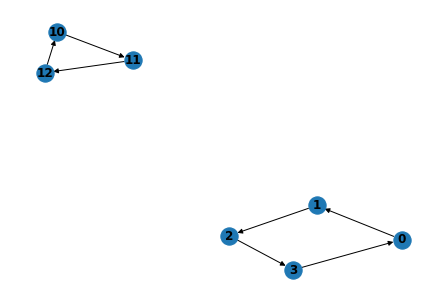

In [ ]:
G = nx.cycle_graph(4, create_using=nx.DiGraph())
nx.add_cycle(G, [10, 11, 12])
nx.draw(G, with_labels=True, font_weight='bold')

print(sorted(nx.strongly_connected_components(G), key=len, reverse=True))

# Topological Sort


[[1, 2, 4, 3], [1, 2, 3, 4]]

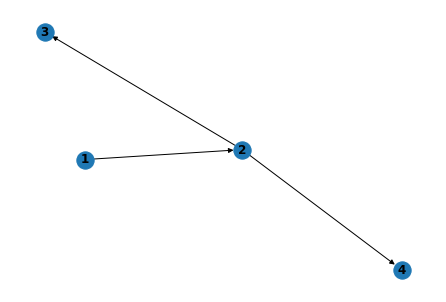

In [ ]:
DG = nx.DiGraph([(1, 2), (2, 3), (2, 4)])
nx.draw(DG, with_labels=True, font_weight='bold')

list(nx.all_topological_sorts(DG))

# Maximum Flow

3.0
{'x': {'a': 2.0, 'b': 1.0}, 'a': {'c': 2.0}, 'b': {'c': 0, 'd': 1.0}, 'c': {'y': 2.0}, 'd': {'e': 1.0}, 'e': {'y': 1.0}, 'y': {}}


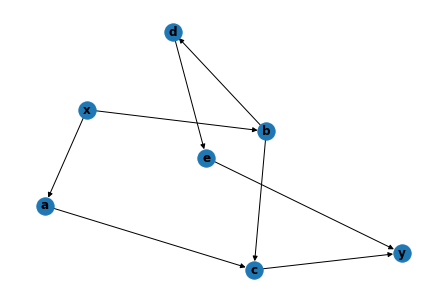

In [ ]:
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)
nx.draw(G, with_labels=True, font_weight='bold')

flow_value, flow_dict = nx.maximum_flow(G, "x", "y")
print(flow_value)
print(flow_dict)


# Centrality 

{0: 0.020833333333333332,
 1: 0.037037037037037035,
 2: 0.09259259259259257,
 3: 0.05555555555555555,
 4: 0.15277777777777776,
 5: 0.06944444444444445,
 6: 0.037037037037037035,
 7: 0.07870370370370369,
 8: 0.020833333333333332,
 9: 0.3796296296296296}

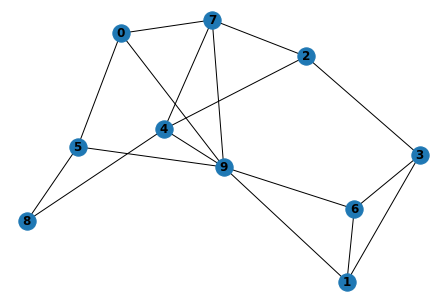

In [ ]:
RG = nx.gnp_random_graph(10, 0.3)
nx.draw(RG, with_labels=True, font_weight='bold')

nx.betweenness_centrality(RG)

Check (and try) more: https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

Check more: https://networkx.github.io/documentation/stable/reference/algorithms/index.html